In [2]:
###### Read wide table from one drive
widecsv=read.csv("ED Fig.6b.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%25< 6 & i%%25 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%25< 14 & i%%25 >= 6){
    tallcsv[i,3] <- "Two"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%25< 21 & i%%25 >= 14){
    tallcsv[i,3] <- "Tree"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%25 >= 21 | i%%25 == 0){
    tallcsv[i,3] <- "Four"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"ED Fig.6b_tall.csv", row.names = FALSE)



          VALUE       Treatment Trial
1    38326.9600        X01.DMSO   One
2    39807.4400        X01.DMSO   One
3    20255.6700        X01.DMSO   One
4            NA        X01.DMSO   One
5            NA        X01.DMSO   One
6    28136.2900        X01.DMSO   Two
7     1011.9450        X01.DMSO   Two
8    35579.6700        X01.DMSO   Two
9     2587.7740        X01.DMSO   Two
10   17193.5300        X01.DMSO   Two
11           NA        X01.DMSO   Two
12           NA        X01.DMSO   Two
13           NA        X01.DMSO   Two
14   11937.2800        X01.DMSO  Tree
15   41485.3500        X01.DMSO  Tree
16   49526.4800        X01.DMSO  Tree
17    9521.8760        X01.DMSO  Tree
18    4757.8420        X01.DMSO  Tree
19           NA        X01.DMSO  Tree
20           NA        X01.DMSO  Tree
21    4675.7480        X01.DMSO  Four
22   27543.9800        X01.DMSO  Four
23   11638.1600        X01.DMSO  Four
24    6694.1970        X01.DMSO  Four
25           NA        X01.DMSO  Four
26   57927.2

In [4]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [5]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("ED Fig.6b_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment     VALUE Trial
1  X01.DMSO 38326.960   One
2  X01.DMSO 39807.440   One
3  X01.DMSO 20255.670   One
4  X01.DMSO 28136.290   Two
5  X01.DMSO  1011.945   Two
6  X01.DMSO 35579.670   Two


[1] 51  5

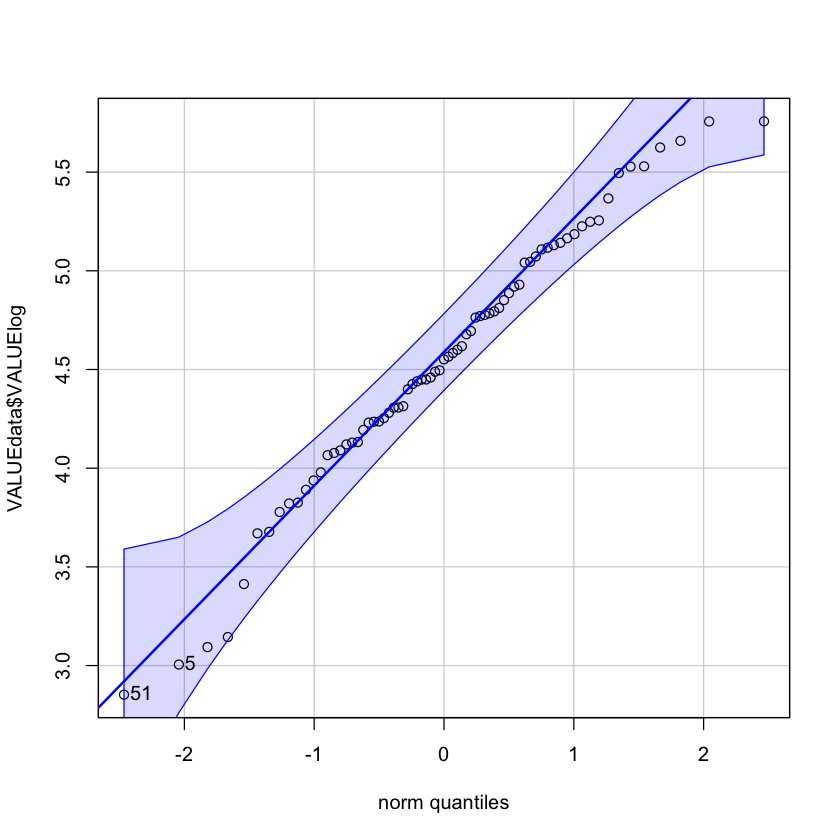

In [6]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


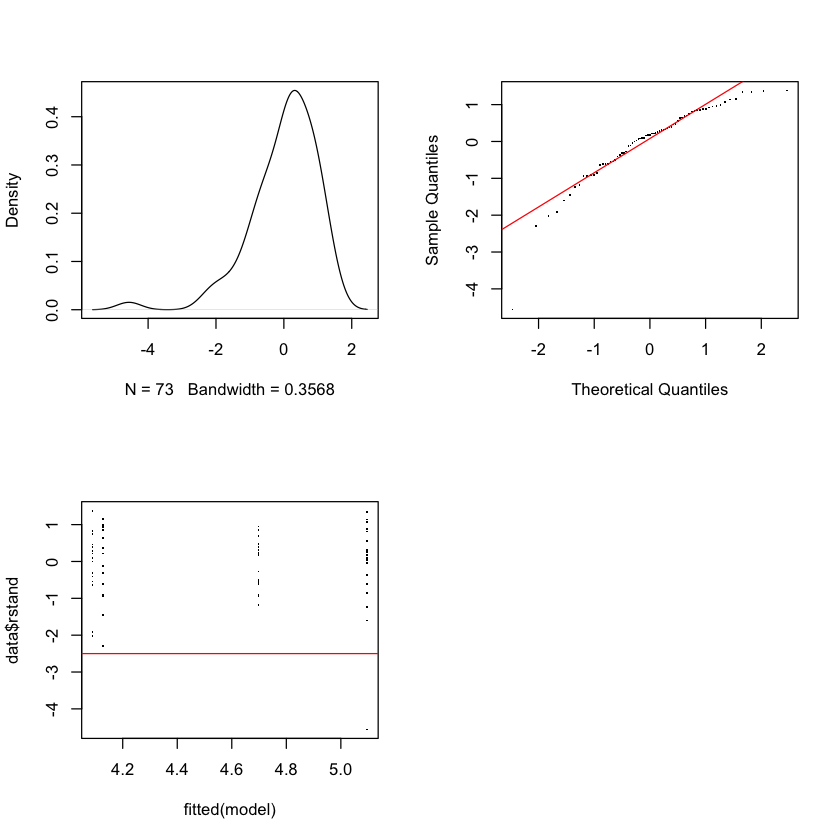

In [7]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [8]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
   114.5    128.3    -51.3    102.5       67 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5951 -0.5499  0.1823  0.7116  1.3943 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 Trial    (Intercept) 6.160e-20 2.482e-10
 Residual             2.385e-01 4.884e-01
Number of obs: 73, groups:  Trial, 4

Fixed effects:
                         Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)               4.12889    0.11844 73.00000  34.859  < 2e-16 ***
TreatmentX02.flg20_1_nM  -0.03914    0.16751 73.00000  -0.234  0.81590    
TreatmentX03.Maya2_10_uM  0.96768    0.15770 73.00000   6.136 3.97e-08 ***
TreatmentX04.flg22_1_nM   0.56874    0.16751 73.00000   3.395  0.00111 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

C

In [9]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF       F value     
 Min.   :13.56   Min.   :4.519   Min.   :3   Min.   :73   Min.   :18.95  
 1st Qu.:13.56   1st Qu.:4.519   1st Qu.:3   1st Qu.:73   1st Qu.:18.95  
 Median :13.56   Median :4.519   Median :3   Median :73   Median :18.95  
 Mean   :13.56   Mean   :4.519   Mean   :3   Mean   :73   Mean   :18.95  
 3rd Qu.:13.56   3rd Qu.:4.519   3rd Qu.:3   3rd Qu.:73   3rd Qu.:18.95  
 Max.   :13.56   Max.   :4.519   Max.   :3   Max.   :73   Max.   :18.95  
     Pr(>F)        
 Min.   :3.45e-09  
 1st Qu.:3.45e-09  
 Median :3.45e-09  
 Mean   :3.45e-09  
 3rd Qu.:3.45e-09  
 Max.   :3.45e-09  
       X01.DMSO  X02.flg20_1_nM X03.Maya2_10_uM  X04.flg22_1_nM 
            "a"             "a"             "b"             "b" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypothese